The notebook with its additional packages is developed from a kaggle notebook by Mauricio Cordeiro:

https://www.kaggle.com/code/cordmaur/38-cloud-data-preparation


The SceneDataset class is exactly the one written by Mauricio Cordeiro and the SceneDataset class is a slight modification it.


# General Imports

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import svm

from scipy.stats import pearsonr   

# Custom Imports

In [2]:
from cloud_classification_data import import_scene_ids, CloudDataset, SceneDataset
from cloud_classification_visualization import plot_scene_mask, BlueAlphaRed, AlphaRed, plot_scene_mask_difference, show_bands_summary

# Data Import

### Available scenes

In [3]:
base_path = Path('../38-Cloud_training')
scene_id_path = base_path/'training_sceneids_38-Cloud.csv'
scene_id = import_scene_ids(scene_id_path)

print(scene_id)

['LC08_L1TP_002053_20160520_20170324_01_T1', 'LC08_L1TP_002054_20160520_20170324_01_T1', 'LC08_L1TP_011002_20160620_20170323_01_T1', 'LC08_L1TP_011247_20160620_20170323_01_T1', 'LC08_L1TP_029040_20160720_20170222_01_T1', 'LC08_L1TP_032029_20160420_20170223_01_T1', 'LC08_L1TP_034034_20160520_20170223_01_T1', 'LC08_L1TP_035034_20160120_20170224_01_T1', 'LC08_L1TP_039034_20160320_20170224_01_T1', 'LC08_L1TP_044010_20160220_20170224_01_T1', 'LC08_L1TP_045026_20160720_20170221_01_T1', 'LC08_L1TP_047023_20160920_20170221_01_T1', 'LC08_L1TP_059014_20160620_20170221_01_T1', 'LC08_L1TP_061017_20160720_20170223_01_T1', 'LC08_L1TP_063016_20160920_20170221_01_T1', 'LC08_L1TP_064014_20160420_20170223_01_T1', 'LC08_L1TP_064017_20160420_20170223_01_T1', 'LC08_L1TP_066017_20160520_20170223_01_T1']


### Dataset import

In [4]:
data = CloudDataset(base_path/'train_red',
base_path/'train_green',
base_path/'train_blue',
base_path/'train_nir',
base_path/'train_gt')

### Scene import

In [5]:
scene = scene_id[0]
base_path = Path('../38-Cloud_training')
scene_data = SceneDataset(base_path/'train_red',
base_path/'train_green',
base_path/'train_blue',
base_path/'train_nir',
base_path/'train_gt', scene)

### Patch overview

In [6]:
patch_id = 100

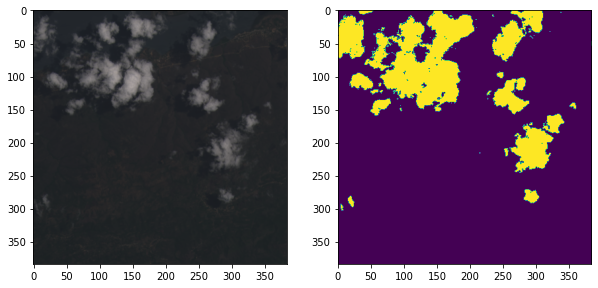

In [7]:
plot_scene_mask(scene_data.open_as_array(patch_id), scene_data.open_mask(patch_id))

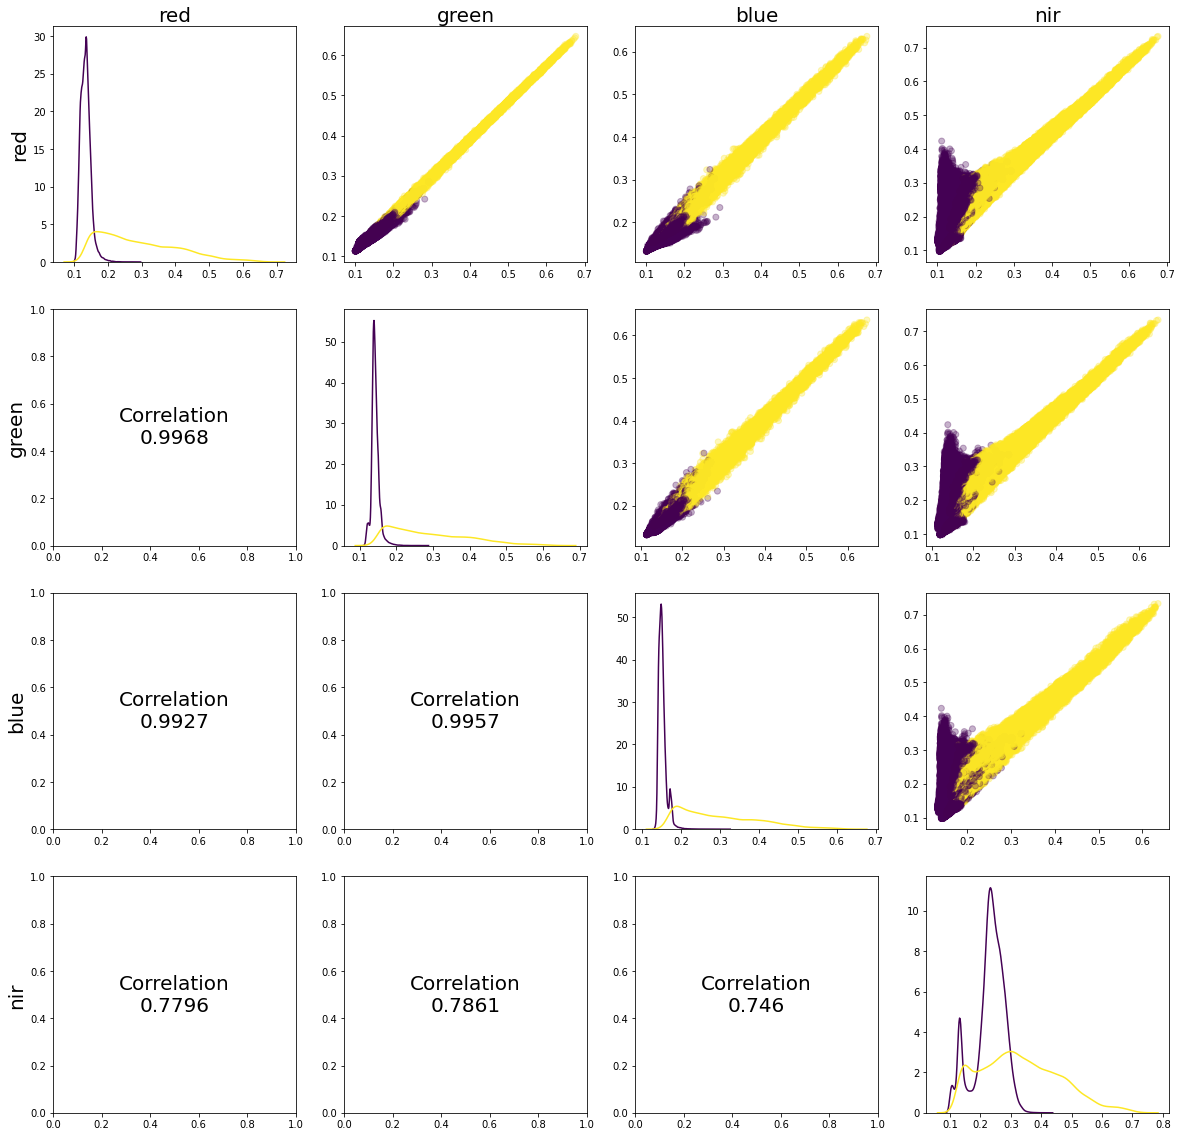

In [9]:
show_bands_summary(scene_data, patch_id)

## SVM classification

## Train - linear kernel

In [40]:
x = scene_data.open_as_points(patch_id)
y = scene_data.open_mask_as_points(patch_id)
clf = svm.SVC(kernel = 'linear')
clf.fit(x, y)

SVC(kernel='linear')

In [41]:
y_predicted = clf.predict(x)
print('SVM score: ',accuracy_score(y, y_predicted))

SVM score:  0.9662407769097222


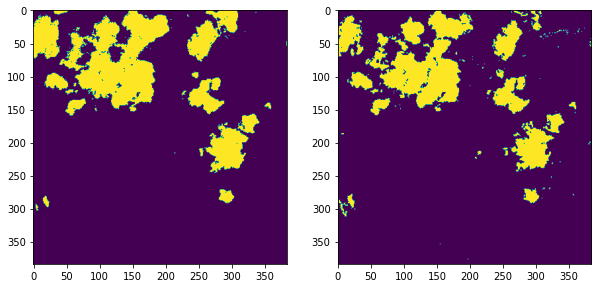

In [42]:
fig, ax = plt.subplots(1,2, figsize=(10,9))
ax[0].imshow(scene_data.open_mask(patch_id))
ax[1].imshow(scene_data.points_to_mask(patch_id,y_predicted))

In [43]:
y_difference = y - y_predicted
y_difference_array = scene_data.points_to_mask(100, y_difference)
y_diff_abs = np.absolute(y_difference)
y_diff_abs_array = scene_data.points_to_mask(100, y_diff_abs)
y_diff_norm = (y_difference + 1)/2.0
y_diff_norm_array = scene_data.points_to_mask(100, y_diff_norm)

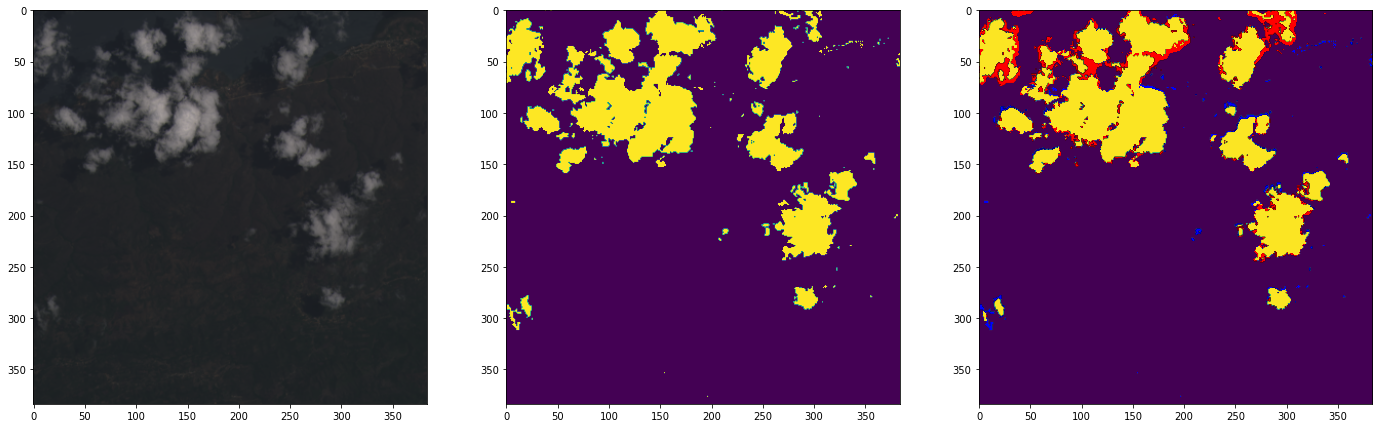

In [44]:
fig, ax = plt.subplots(1,3, figsize=(24,8))
ax[0].imshow(scene_data.open_as_array(patch_id))
ax[1].imshow(scene_data.points_to_mask(patch_id,y_predicted)) #, cmap = 'gray'
ax[2].imshow(scene_data.points_to_mask(patch_id,y_predicted)) #, cmap = 'gray'
ax[2].imshow(y_diff_norm_array, cmap = BlueAlphaRed)

## Test - linear kernel

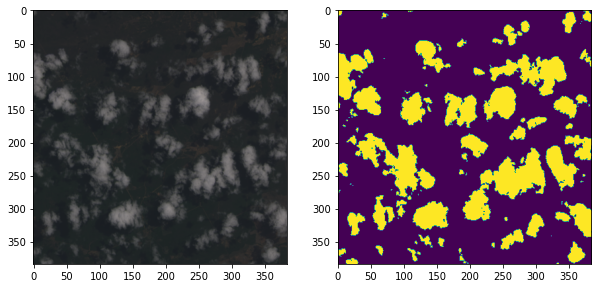

In [45]:
patch_id_test = patch_id + 2
plot_scene_mask(scene_data.open_as_array(patch_id_test), scene_data.open_mask(patch_id_test))

In [46]:
x_test = scene_data.open_as_points(patch_id_test)
y_test = scene_data.open_mask_as_points(patch_id_test)
y_predicted_test = clf.predict(x_test)
print('SVM score: ',accuracy_score(y_test, y_predicted_test))

SVM score:  0.9569227430555556


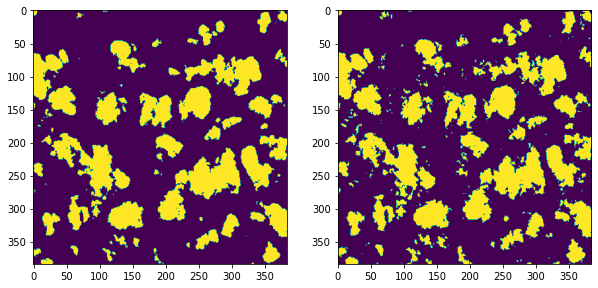

In [47]:
fig, ax = plt.subplots(1,2, figsize=(10,9))
ax[0].imshow(scene_data.open_mask(patch_id_test))
ax[1].imshow(scene_data.points_to_mask(patch_id_test,y_predicted_test))

In [48]:
y_difference = y_test - y_predicted_test
y_difference_array = scene_data.points_to_mask(patch_id_test, y_difference)
y_diff_abs = np.absolute(y_difference)
y_diff_abs_array = scene_data.points_to_mask(patch_id_test, y_diff_abs)
y_diff_norm = (y_difference + 1)/2.0
y_diff_norm_array = scene_data.points_to_mask(patch_id_test, y_diff_norm)

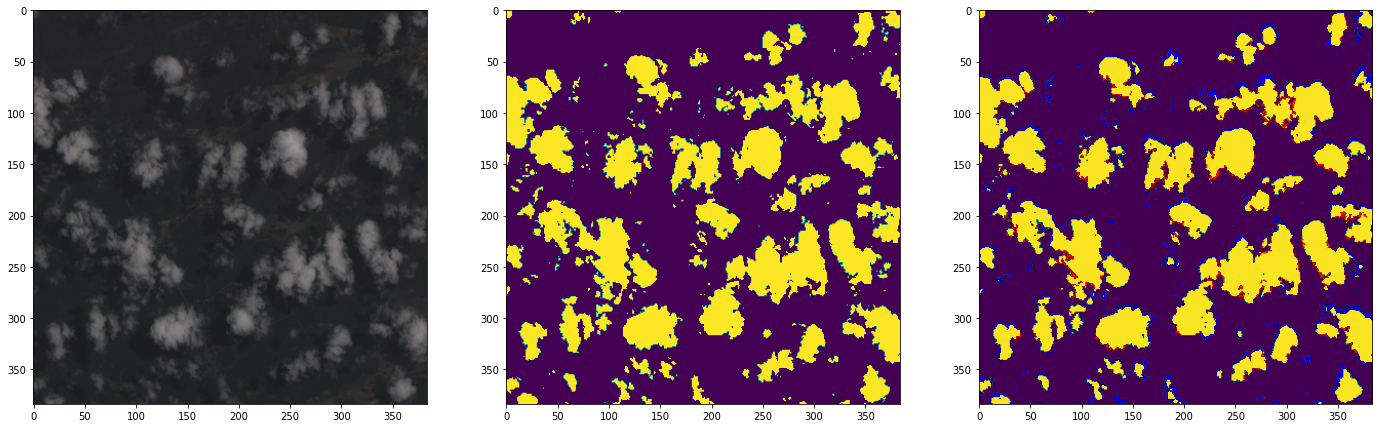

In [49]:
fig, ax = plt.subplots(1,3, figsize=(24,8))
ax[0].imshow(scene_data.open_as_array(patch_id_test))
ax[1].imshow(scene_data.points_to_mask(patch_id_test,y_predicted_test)) #, cmap = 'gray'
ax[2].imshow(scene_data.points_to_mask(patch_id_test,y_predicted_test)) #, cmap = 'gray'
ax[2].imshow(y_diff_norm_array, cmap = BlueAlphaRed)

## Train - gaussian kernel

In [50]:
x = scene_data.open_as_points(patch_id)
y = scene_data.open_mask_as_points(patch_id)
clf = svm.SVC(kernel = 'rbf')
clf.fit(x, y)

SVC()

In [51]:
y_predicted = clf.predict(x)
print('SVM score: ',accuracy_score(y, y_predicted))

SVM score:  0.9716525607638888


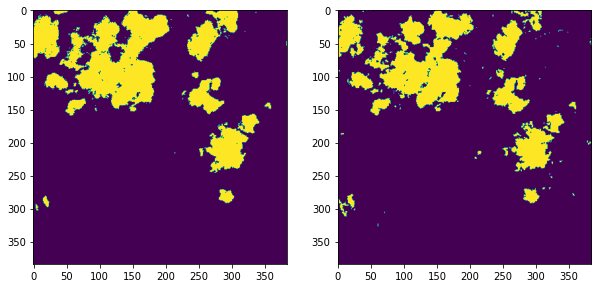

In [52]:
fig, ax = plt.subplots(1,2, figsize=(10,9))
ax[0].imshow(scene_data.open_mask(patch_id))
ax[1].imshow(scene_data.points_to_mask(patch_id,y_predicted))

In [53]:
y_difference = y - y_predicted
y_difference_array = scene_data.points_to_mask(100, y_difference)
y_diff_abs = np.absolute(y_difference)
y_diff_abs_array = scene_data.points_to_mask(100, y_diff_abs)
y_diff_norm = (y_difference + 1)/2.0
y_diff_norm_array = scene_data.points_to_mask(100, y_diff_norm)

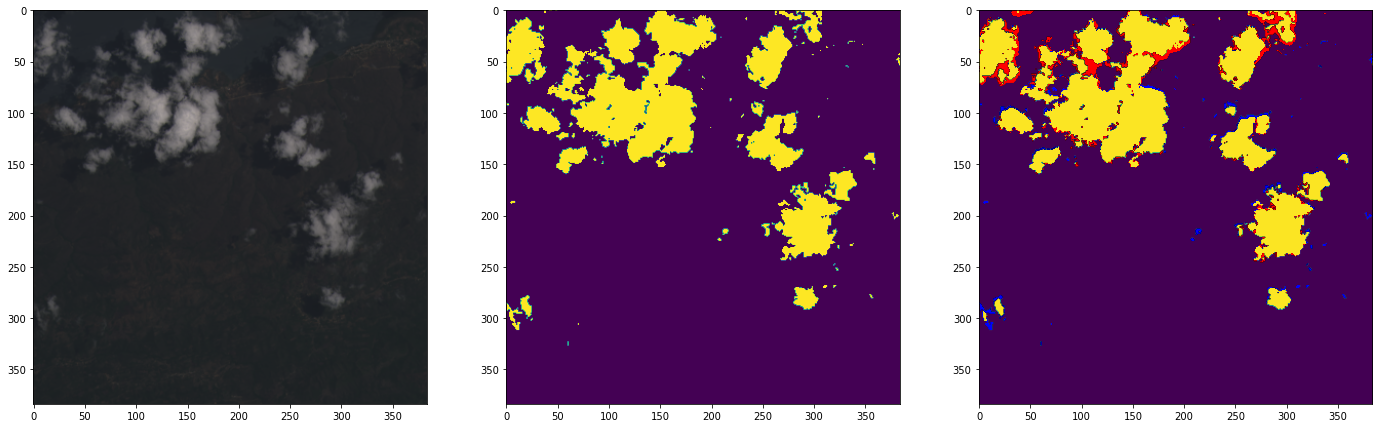

In [54]:
fig, ax = plt.subplots(1,3, figsize=(24,8))
ax[0].imshow(scene_data.open_as_array(patch_id))
ax[1].imshow(scene_data.points_to_mask(patch_id,y_predicted)) #, cmap = 'gray'
ax[2].imshow(scene_data.points_to_mask(patch_id,y_predicted)) #, cmap = 'gray'
ax[2].imshow(y_diff_norm_array, cmap = BlueAlphaRed)

## Test - gaussian kernel

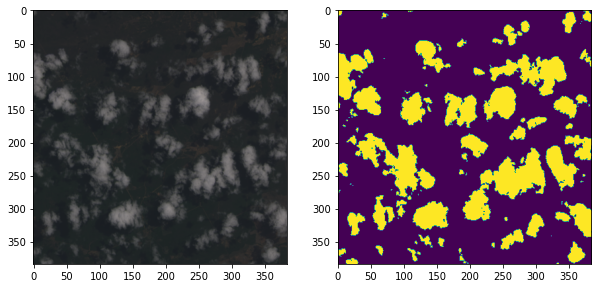

In [55]:
patch_id_test = patch_id + 2
plot_scene_mask(scene_data.open_as_array(patch_id_test), scene_data.open_mask(patch_id_test))

In [56]:
x_test = scene_data.open_as_points(patch_id_test)
y_test = scene_data.open_mask_as_points(patch_id_test)
y_predicted_test = clf.predict(x_test)
print('SVM score: ',accuracy_score(y_test, y_predicted_test))

SVM score:  0.9498155381944444


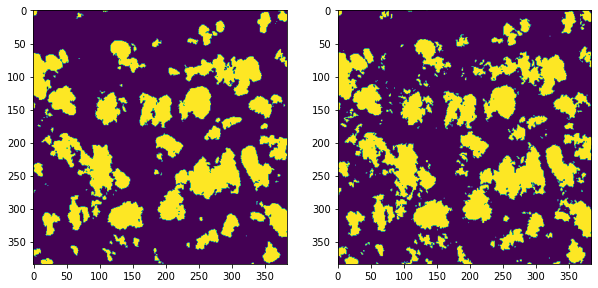

In [57]:
fig, ax = plt.subplots(1,2, figsize=(10,9))
ax[0].imshow(scene_data.open_mask(patch_id_test))
ax[1].imshow(scene_data.points_to_mask(patch_id_test,y_predicted_test))

In [58]:
y_difference = y_test - y_predicted_test
y_difference_array = scene_data.points_to_mask(patch_id_test, y_difference)
y_diff_abs = np.absolute(y_difference)
y_diff_abs_array = scene_data.points_to_mask(patch_id_test, y_diff_abs)
y_diff_norm = (y_difference + 1)/2.0
y_diff_norm_array = scene_data.points_to_mask(patch_id_test, y_diff_norm)

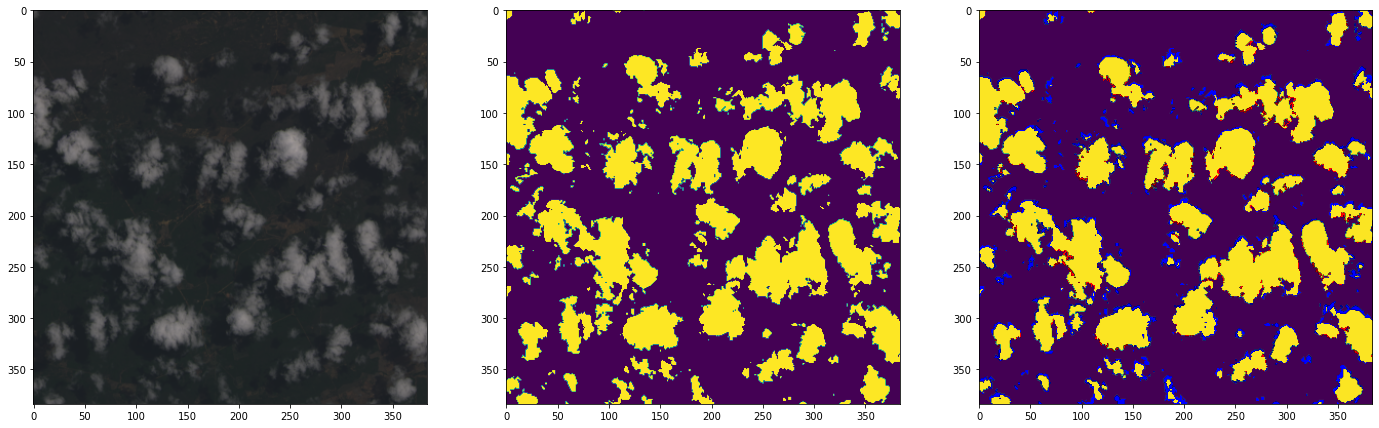

In [59]:
fig, ax = plt.subplots(1,3, figsize=(24,8))
ax[0].imshow(scene_data.open_as_array(patch_id_test))
ax[1].imshow(scene_data.points_to_mask(patch_id_test,y_predicted_test)) #, cmap = 'gray'
ax[2].imshow(scene_data.points_to_mask(patch_id_test,y_predicted_test)) #, cmap = 'gray'
ax[2].imshow(y_diff_norm_array, cmap = BlueAlphaRed)